Image Reconstruction
==================

#### Suchetha Cooray (<cooray@nagoya-u.jp>)

This package and notebook uses the Papoulis-Gerchberg algorithm to reconstruct 2d images that had been affected by instrumental error. The error resulted in a faulty row of pixels in the image. Our motivation is to reconstruct this missing region.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import img_recon as ir

plt.rcParams.update({'figure.dpi': 150})

Let us first read from file and plot the image.

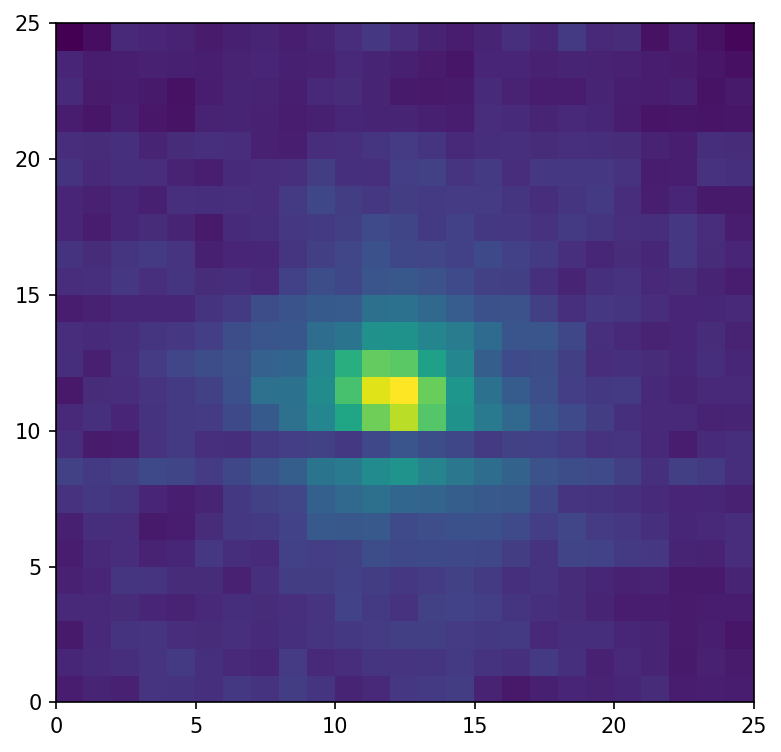

In [13]:
cube_name="i10216m.IRC+10216.20180328202311.16.A01.base"
filename = "Data/integrated_data/" + cube_name + ".fits"

integrated_image = ir.Image.from_file(filename, nanzero=True)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
p1=ax1.pcolormesh(integrated_image.data)

As visible from the image, the error is in the line 10. We can therefore define an error array from this information. Multiple lines can also be defined by passing a list of index of error rows or columns.

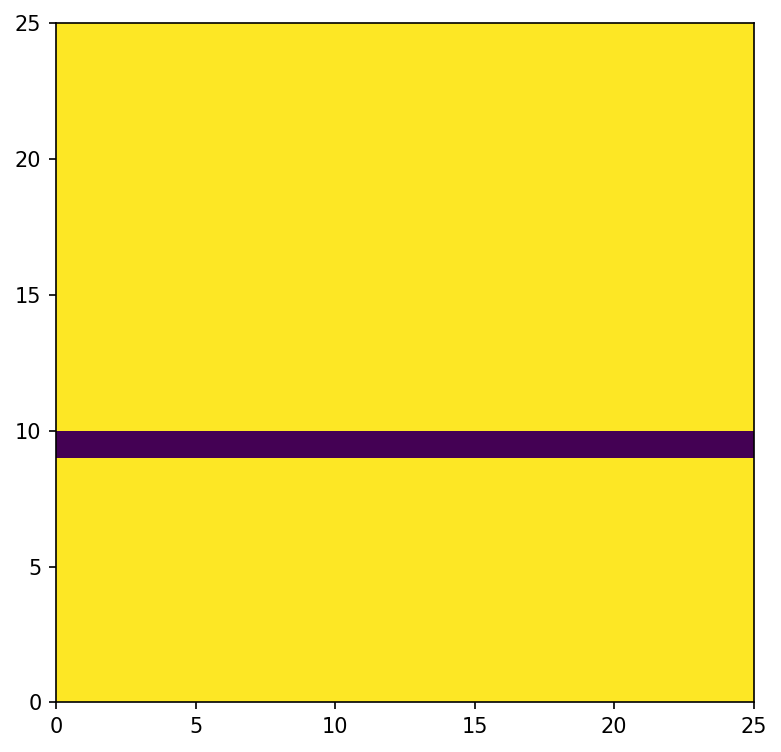

In [14]:
mask = ir.Mask.err_def_line(integrated_image, hline = 10)
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
p1=ax1.pcolormesh(mask.window)

Now we have a look at the Fourier transform of the image to determine the cutoff in frequency space. As we can see from the Fourier transform (shown left), most of the information about the signal is within a radius of 10. We therefore define a mask in the frequency space with radius 10 (shown right).

/Users/Suchetha/MEGA/Git/c_fourier_reconstruction/img_recon.py:121: ComplexWarning: Casting complex values to real discards the imaginary part
  return f_est.astype(float)


Text(0.5,1,'Mask in Frequency Space')

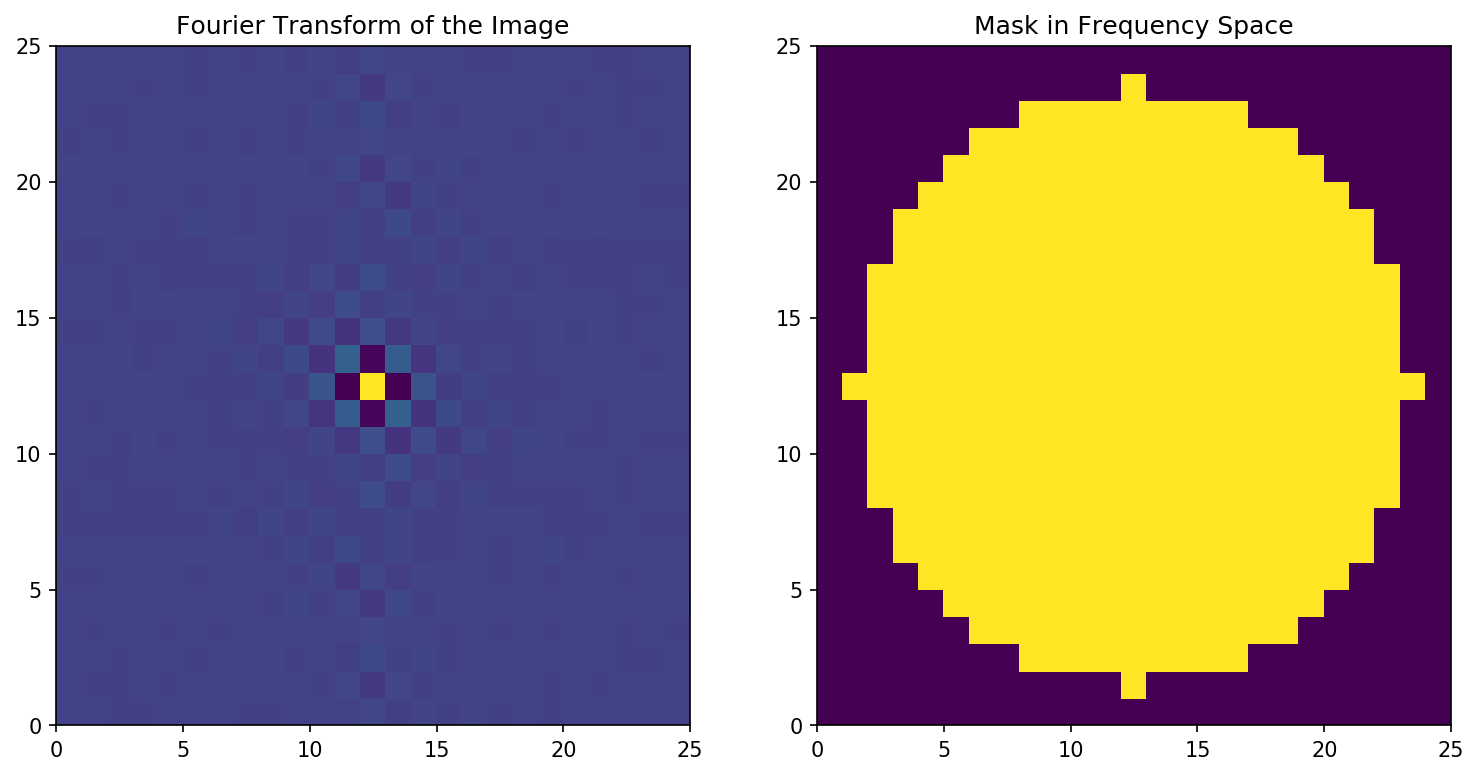

In [15]:
f_img = ir.Image.f_image(integrated_image)
f_wind = ir.Image.f_window(integrated_image, freq_cut=11)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
p1=ax1.pcolormesh(f_img)
ax1.set_title("Fourier Transform of the Image")

ax2 = fig.add_subplot(122)
p2=ax2.pcolormesh(f_wind)
ax2.set_title("Mask in Frequency Space")

Now we recontruct the image by calling `ir.Image.reconstruct` and plot the result. We can either start by creating an instance of `ImageObj` or pass everything seperately.

/Users/Suchetha/MEGA/Git/c_fourier_reconstruction/img_recon.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  o_a=est.astype(float)


Text(0.5,1,'Observed')

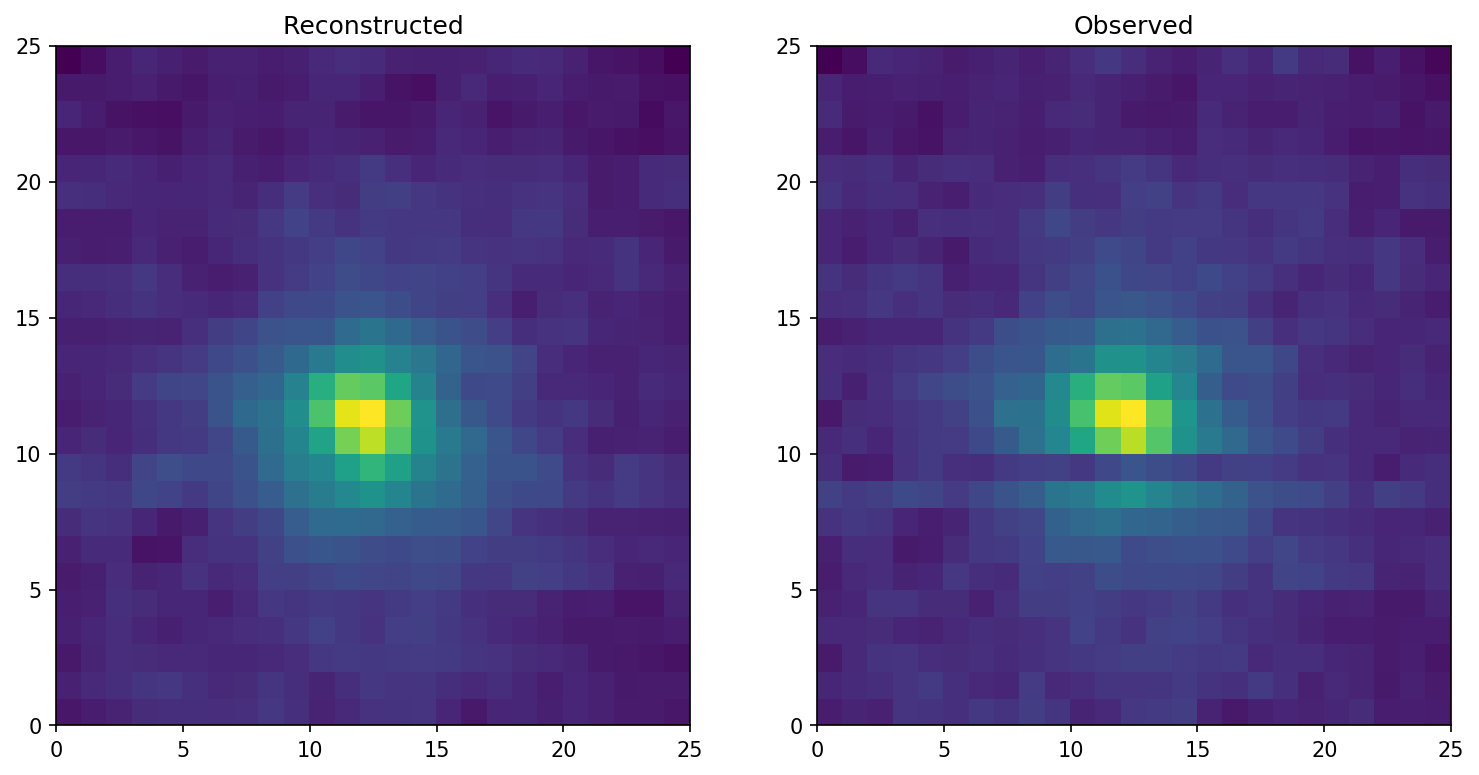

In [16]:
image_object = ir.ImageObj(integrated_image, mask, freq_cut=10)
reconstructed_image_object = ir.Image.reconstruct(image_object)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
p1=ax1.pcolormesh(reconstructed_image_object.data)
ax1.set_title("Reconstructed")

ax2 = fig.add_subplot(122)
p2=ax2.pcolormesh(integrated_image.data)
ax2.set_title("Observed")

ImageObj contains the necessary information of the reconstruction. They include the mask and the cutoff frequency used.